
<img src="https://www.envano.com/wp-content/uploads/2017/08/AI_Object_Recognition_Feature_Img.jpg" width=500px> 
# Computer Vision
Selamat kalian sudah menjalani FG sejauh ini! Sekarang kita akan belajar mengenai Computer Vision. Apa itu Computer Vision? Mari kita pelajari

### Apa itu Computer Vision?
Computer Vision merupakan ilmu yang mempelajari mengenai bagaimana computer dapat melihat dan mengenali suatu objek

### Apa saja ranah dari Computer Vision?
#### Object Detection

<img src="http://www.arcsoft.com/resource/image/technology/object-recognition/object-recognition-feature.jpg" width=400px>

Prinsip Object Detection adalah <b>mencari</b> object yang berada di suatu gambar

#### Object Recognition

<img src="https://www.mathworks.com/content/mathworks/www/en/solutions/deep-learning/object-recognition/jcr:content/mainParsys/band_copy_1227855798/mainParsys/columns_1606542234/2/image_copy_copy.adapt.full.low.svg/1541451136653.svg" width=400px>

Prinsip Object Recognition adalah <b>mengenali</b> object yang berada di suatu gambar

Untuk Focus Group kali ini, kita akan berfokus pada object recognition



### Bagaimana Object Recognition Bekerja?
Jadi kita akan mengenali bagaimana si object recognition bekerja, kurang lebih seperti ini

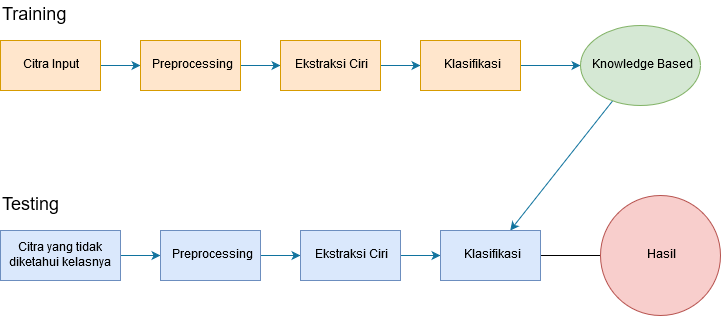

Oke, ayo kita mengenali masing-masing step. Ada dua proses, yaitu proses training dan proses testing. Nah klo training itu dia belajar dulu seperti apa objek yang akan dia kenali. Kalau testing itu dia akan diberikan gambar dan dia harus bisa menebak itu objek apa.

Nah, Apa aja sih yang dilakukan oleh training dan testing? mari kita pelajari




#### Preprocessing
Preprocessing itu ibaratkan memasak sayuran. Sebelum masuk ke kompor, sayuran itu harus dicuci bersih dan dikupas. Sama halnya dengan gambar, perlu dilakukan preprocessing untuk membersihkan datanya agar dapat hasil yang maksimal. Preprocessing bisa berupa resize, menghilangkan noise, dan mengubah color space.


#### Ekstraksi Ciri
Ekstraksi Ciri itu seperti merangkum. Kita ingin mengenali sesuatu melalui bagian objek yang dikatakan berbeda. Oke ini ada sedikit pertanyaan kecil.

##### Pertanyaan Kecil

<img src="https://previews.123rf.com/images/titco/titco1801/titco180100428/93871888-stone-wall-background-white-painted-stone-wall-wood-texture-as-background-wood-background-wall-paint.jpg" width=200px>

Apa yang membedakan tembok kayu dengan tembok batu?




<img src="https://apaperbedaan.com/wp-content/uploads/2016/08/JeruknipisLemon-730x350.jpg" width=400px>

Apa yang membedakan jeruk lemon dan jeruk nipis? kan sama2 jeruk.





<img src="http://aveheart.com/wp-content/uploads/2015/08/Sayur-sayuran-hijau.jpg
" width=300px>

Apa yang membedakan sayur-sayuran ini? Mereka sama-sama warna hijau.

Nah, jadi dari perumpamaan diatas bisa disimpulkan bahwa komputer akan mengenali objek berdasarkan sifat bentuk, warna, dan teksturnya. Terus, gimana caranya komputer bisa tahu bentuk warna dan teksturnya? Itulah adanya ekstraksi ciri. Jadi jenis ekstraksi ciri itu ada 3.

Ekstraksi Ciri Tekstur
- LBP
- GLCM

Ekstraksi Ciri Bentuk
- HOG
- Shape Context
- Chain Code

Ekstraksi Ciri Warna
- Color Histogram
- Fuzzy Color Histogram

In [0]:
#Contoh Ekstraksi Ciri HOG
import matplotlib.pyplot as plt
import cv2

from skimage.feature import hog
from skimage import data, exposure


image = cv2.cvtColor(data.astronaut(),cv2.COLOR_BGR2GRAY)

fd = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1))
print(fd)

[0.16431698 0.13963594 0.05169785 ... 0.04352506 0.04816055 0.25883662]


/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


Sumber Code : Dokumentasi Skimage

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


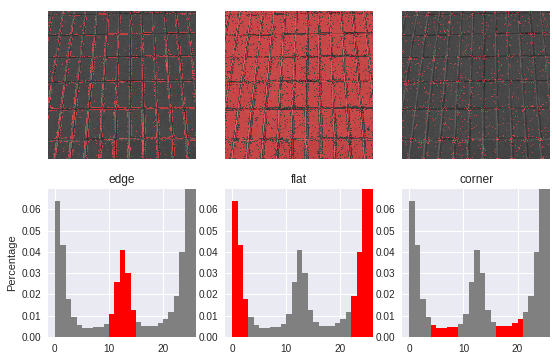

In [0]:
#Contoh Ekstraksi Ciri LBP
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb
import numpy as np

# settings for LBP
radius = 3
n_points = 8 * radius


#Settingan Histogram
def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


#Load Data
image = data.load('brick.png')

#Library LBP
lbp = local_binary_pattern(image, n_points, radius, METHOD)

#Ambil Histogram LBP
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

Sumber Code : Dokumentasi Skimage

#### Klasifikasi
Klasifikasi merupakan pembagian suatu objek menurut kelas-kelas. Pada bagian ini, objek yang sudah diekstraksi ciri akan dibagi berdasarkan jenis kelasnya. Contohnya seperti pembagian jenis sayuran hijau berdasarkan bentuknya.

<img src="https://www.wolfram.com/language/11/neural-networks/assets.en/object-classification/smallthumb_3.png">



## Akhirnya Selesai
Alhamdulillah.... FG kita telah selesai
Terima Kasih telah berbaik hati mengikuti FG ini :) Semoga ilmu yang diberikan selama ini dapat digunakan untuk kebaikan :D
Bagi yang sedang menjalani TA semoga dilancarkan 
Bagi yang sedang kuliah semoga nilainya bagus